In [1]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random


In [2]:
fashion_train_df = pd.read_csv("C:/Users/Akshata Patil/Desktop/Project/A-Z Project/fashion-mnist_train.csv",sep=',')
fashion_test_df = pd.read_csv("C:/Users/Akshata Patil/Desktop/Project/A-Z Project/fashion-mnist_test.csv", sep = ',')

In [3]:
#visulaization
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.shape

(60000, 785)

In [7]:
#creating array :
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [8]:
training.shape

(60000, 785)

In [9]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

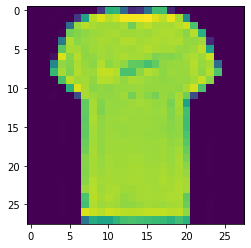

In [11]:
plt.imshow(training[10,1:].reshape(28,28))

3.0

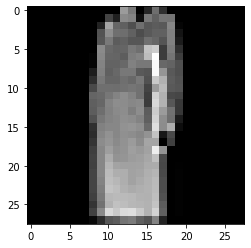

In [12]:
i = random.randint(1,60000)
plt.imshow( training[i,1:].reshape((28,28)) ) #reshape the image
plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray')
label = training[i,0]
label

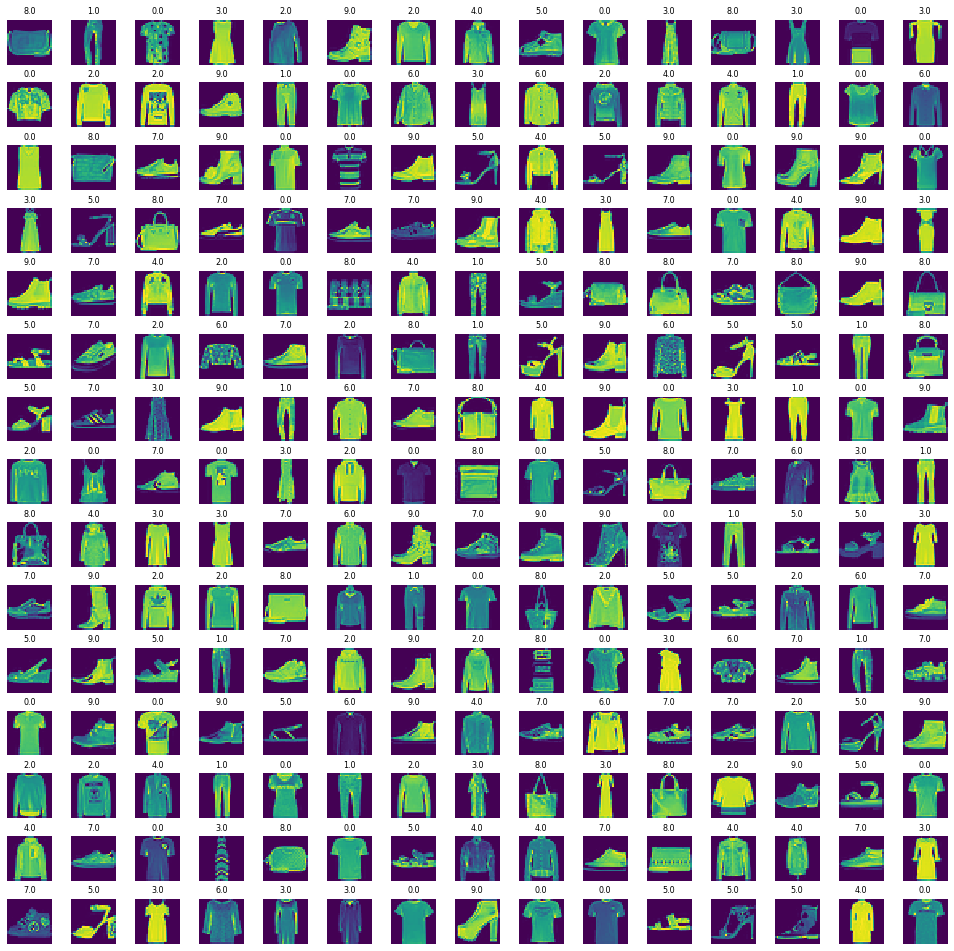

In [13]:
W_grid = 15
L_grid = 15


fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

for i in np.arange(0, W_grid * L_grid): 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


In [14]:
#training mmodel 
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [16]:
X_train.shape

(48000, 784)

In [17]:
y_train.shape

(48000,)

In [18]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))


In [19]:
X_train.shape


(48000, 28, 28, 1)

In [20]:
X_test.shape

(10000, 28, 28, 1)

In [21]:
X_validate.shape

(12000, 28, 28, 1)

In [22]:
import keras

Using TensorFlow backend.
C:\Users\Akshata Patil\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Akshata Patil\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Akshata Patil\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Akshata Patil\anaconda3\lib\site-packages\tenso

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Akshata' is not recognized as an internal or external command,
operable program or batch file.


In [24]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [25]:
cnn_model = Sequential()

In [26]:
cnn_model.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))

C:\Users\Akshata Patil\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [27]:
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

In [28]:
cnn_model.add(Dropout(0.25))

In [29]:

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

C:\Users\Akshata Patil\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  
C:\Users\Akshata Patil\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [31]:
epochs = 50

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))


C:\Users\Akshata Patil\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 38s 802us/step - loss: 0.9073 - accuracy: 0.6475 - val_loss: 0.5027 - val_accuracy: 0.8262
Epoch 2/50
48000/48000 [==============================] - 37s 779us/step - loss: 0.4719 - accuracy: 0.8336 - val_loss: 0.4325 - val_accuracy: 0.8500
Epoch 3/50
48000/48000 [==============================] - 37s 780us/step - loss: 0.4116 - accuracy: 0.8553 - val_loss: 0.3852 - val_accuracy: 0.8687
Epoch 4/50
48000/48000 [==============================] - 38s 796us/step - loss: 0.3814 - accuracy: 0.8668 - val_loss: 0.3622 - val_accuracy: 0.8770
Epoch 5/50
48000/48000 [==============================] - 38s 785us/step - loss: 0.3598 - accuracy: 0.8757 - val_loss: 0.3408 - val_accuracy: 0.8825
Epoch 6/50
48000/48000 [==============================] - 38s 787us/step - loss: 0.3371 - accuracy: 0.8826 - v

In [32]:
#Evaluation
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 2s 246us/step
Test Accuracy : 0.917


In [33]:
predicted_classes = cnn_model.predict_classes(X_test)

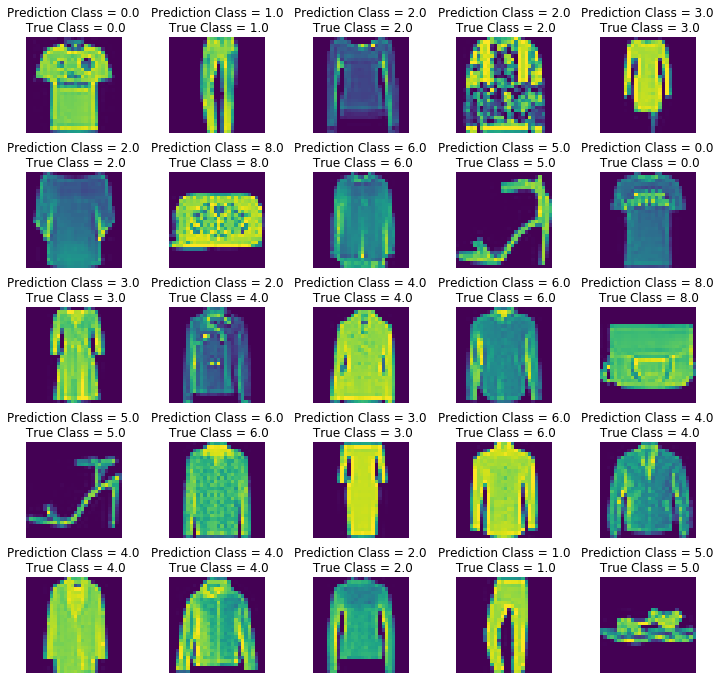

In [34]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


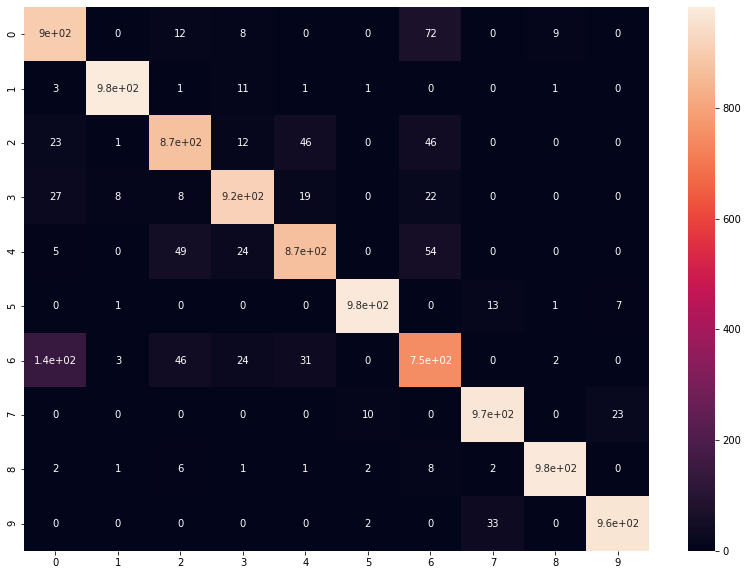

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)